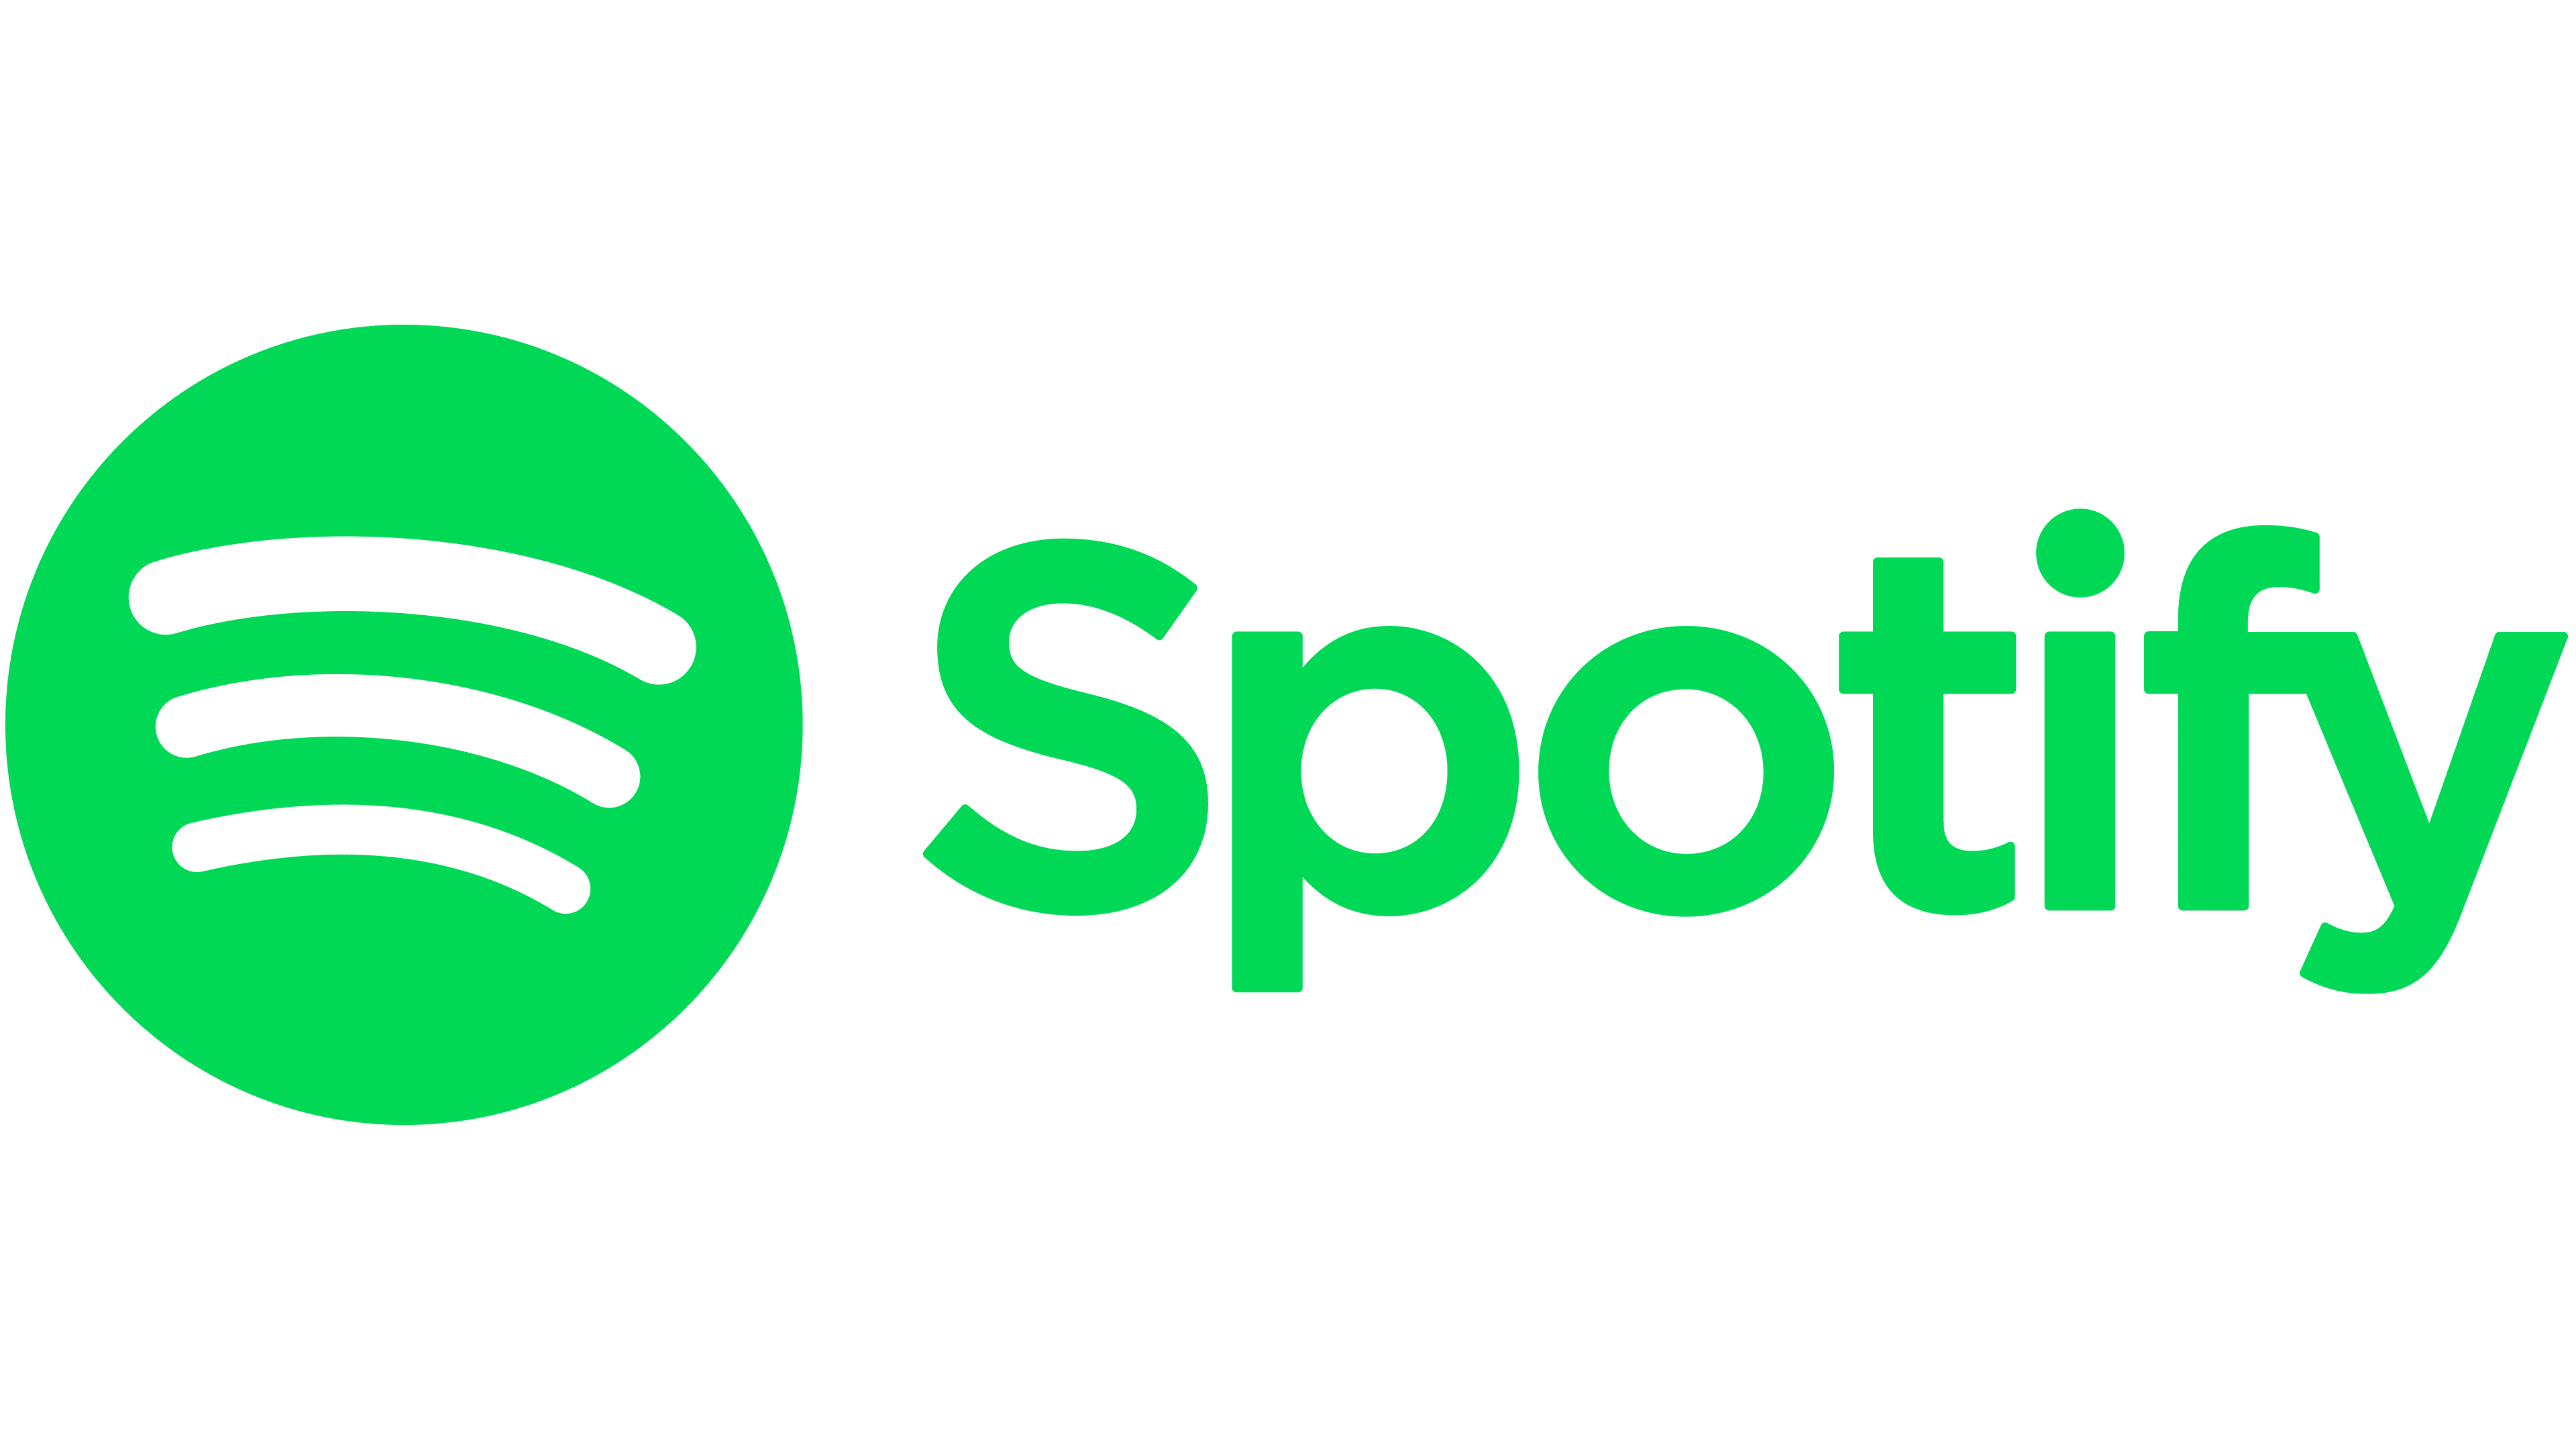

<div class="list-group" id="list-tab" role="tablist">
<h2 class="list-group-item list-group-item-action active" data-toggle="list" style='background:black; border:0; color:white' role="tab" aria-controls="home"><center>Interazione con le API di Spotify, estrazione dei dati e analisi statistiche</center></h2>

**Spotify** è un servizio di streaming musicale molto popolare che offre agli utenti l'accesso a un vasto catalogo di brani musicali da riprodurre in streaming su Internet. Fondata nel 2006, Spotify ha rivoluzionato il modo in cui le persone ascoltano musica, consentendo loro di ascoltare brani di artisti di tutto il mondo su computer, smartphone, tablet e altri dispositivi connessi a Internet.
    
Le **API** (Application Programming Interface) di Spotify permettono la creazione di applicazioni che possono interagire con il servizio streaming di Spotify allo scopo di effettuare operazioni quali: recupero di metadati, raccomandazione, creazione e gestione delle playlist. Le API di Spotify sfruttano il protocollo **OAuth 2.0**, il quale funziona in modo specifico con HTTP (Hypertext Transfer Protocol) e consente a un utente di concedere l'accesso limitato alle risorse protette.  

Il tutorial procederà con i seguenti punti:
* [**Accesso alle API**](#1)
* [**Estrazione dati e analisi**](#2)
* [**Conclusione**](#3)

<a id="1"></a>
<div class="list-group" id="list-tab" role="tablist">
<h2 class="list-group-item list-group-item-action active" data-toggle="list" style='background:black; border:0; color:white' role="tab" aria-controls="home"><center>1. Accesso alle API</center></h2>
    


**1.1 - Creazione dell'account:**
Il primo passo consiste nel creare un account Spotify.

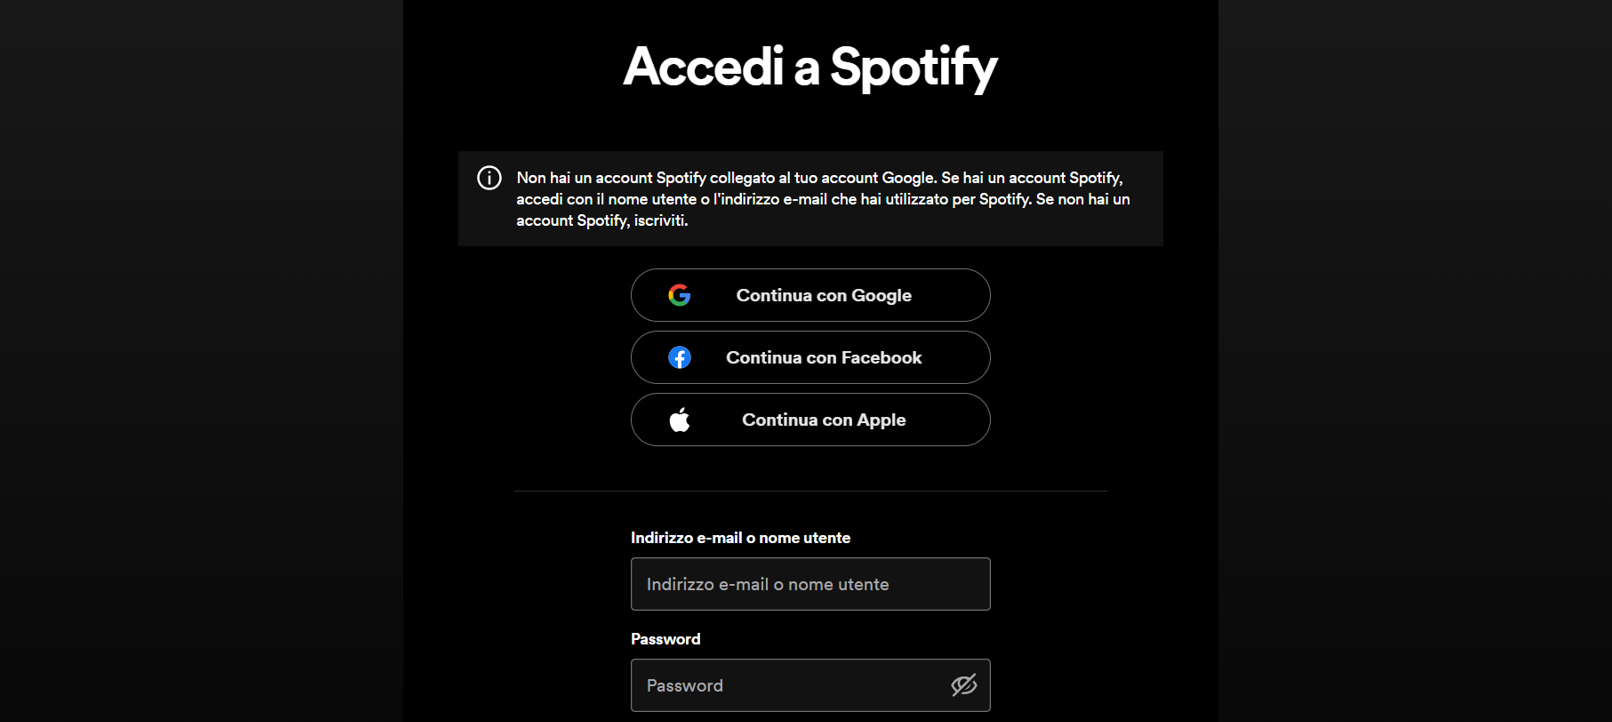



**1.2 - Creazione dell'applicazione**

* **app name:** nome che vogliamo assegnare all'applicazione. Es. TutorialSocialMedia
* **app description:** una breve descrizione dell'intento dell'app. Es. "This is a tutorial for an academic university project."
* **website**
* **redicter URI:** Es. https://example.org/callback

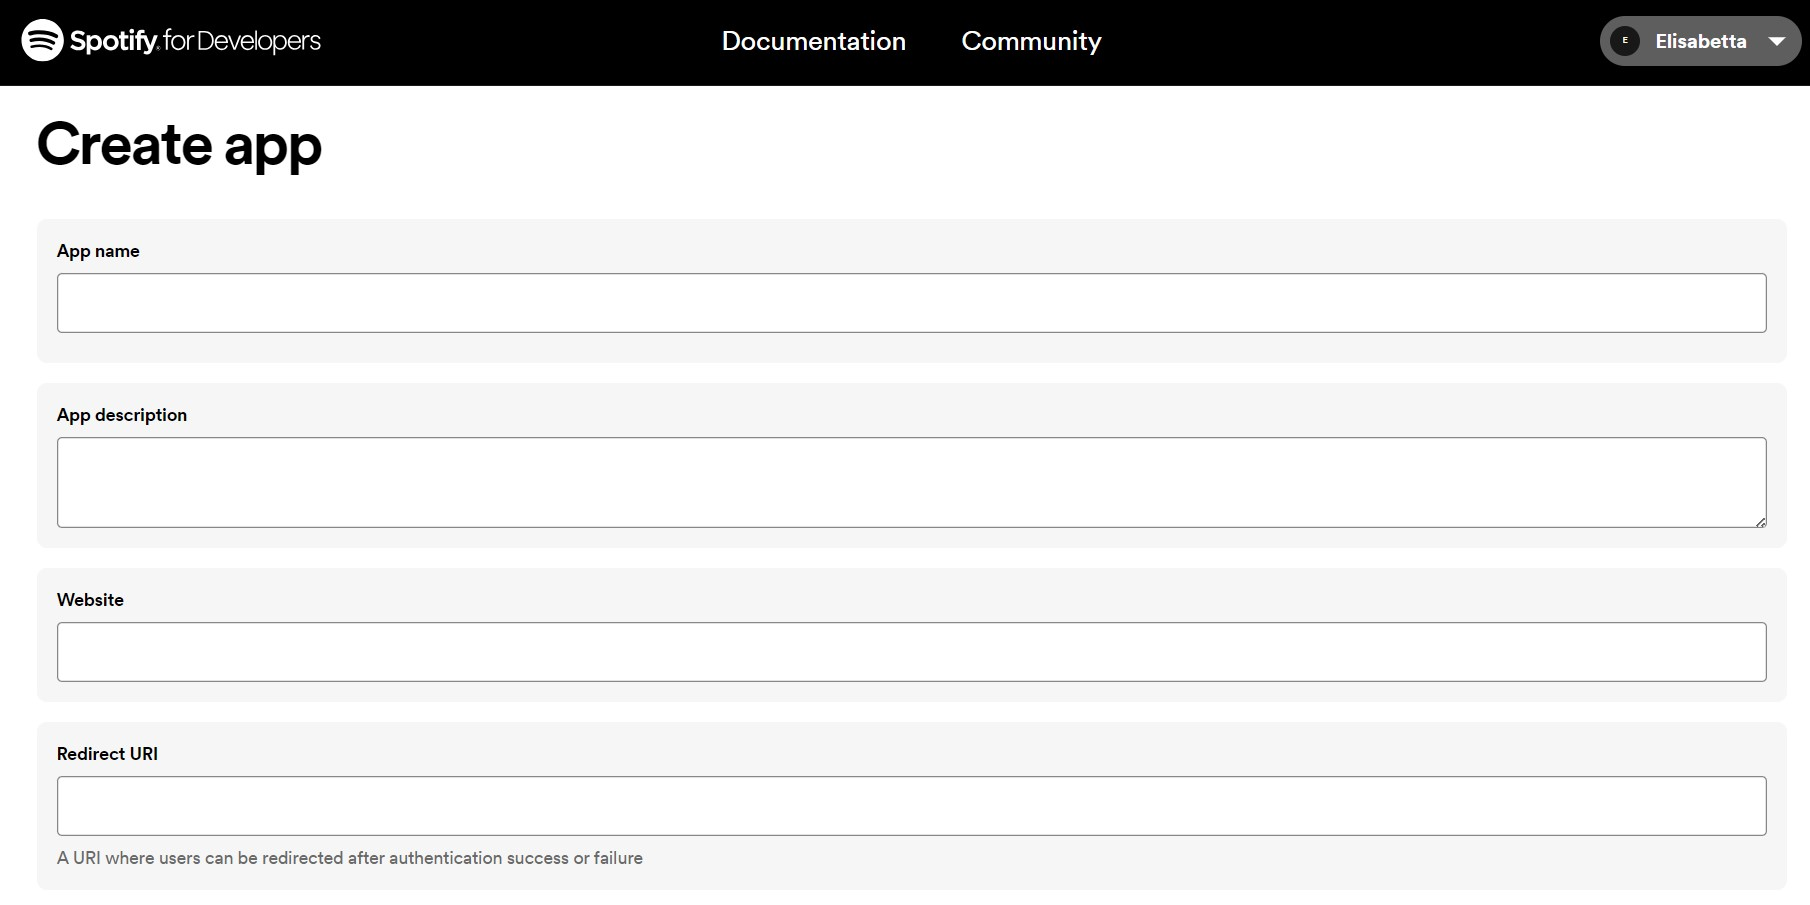

L'applicazione fornisce le **credenziali**, ovvero **"client id"** e **"client secret"**, usate per richiedere all'API il token di accesso.

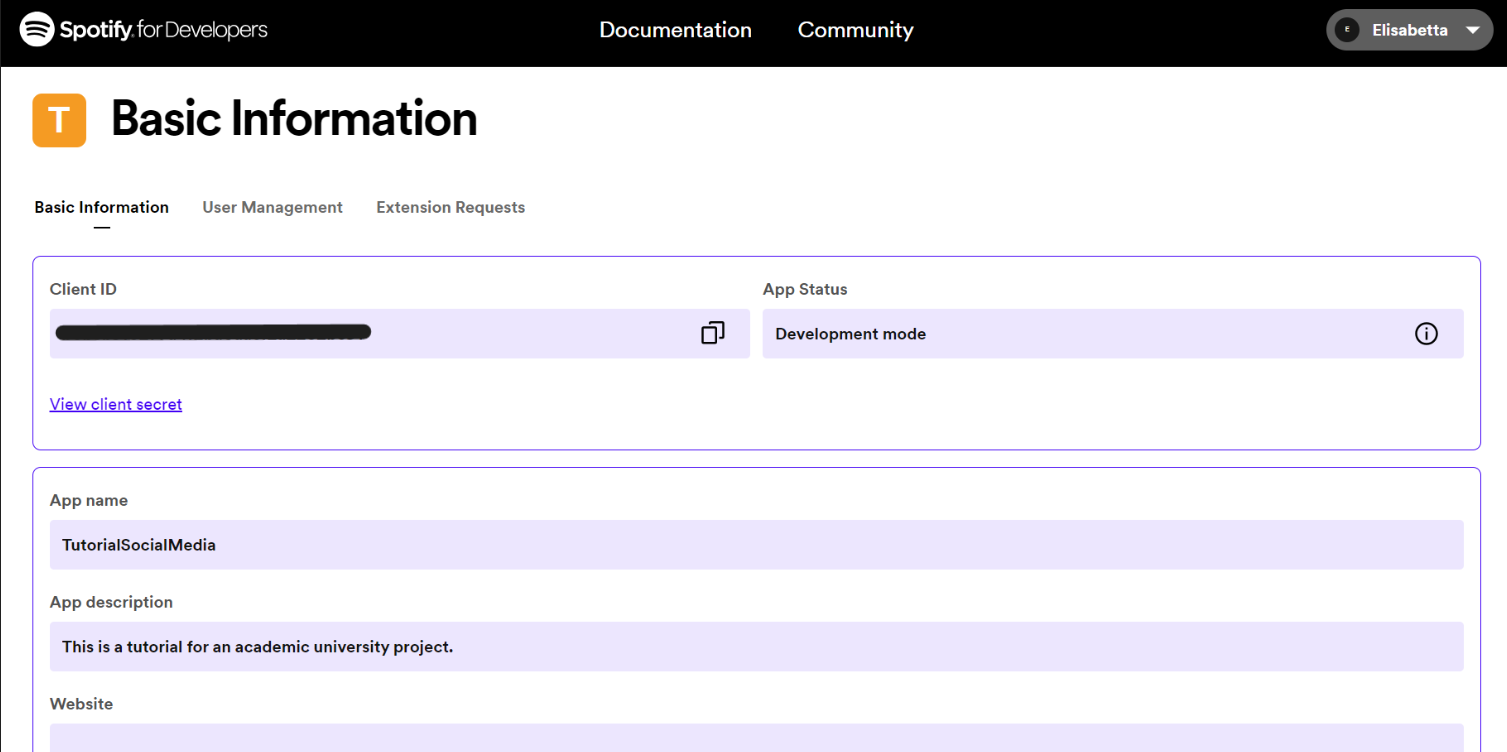

**1.3 - richiesta del token**
     
 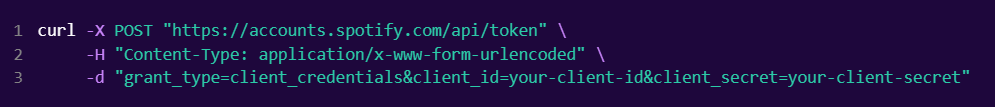

- **-X POST "https://accounts.spotify.com/api/token"** : è implementato dalla funzione "post";
- **-H "Content-Type: application/x-www-form-urlencoded"** : è un header aggiuntivo. Serve a specificare l'invio delle credenziali come coppie chiave-valore da parte di un client web a un server, in modo che il server possa elaborarle in modo appropriato. 
- **-d "grant_type=client_credentials&client_id=your-client-id&client_secret=your-client-secret"** : il tipo di dato (grant_type) e le credenziali (client_id e client_secret) sono inviate dentro il campo dati della richiesta.

Come già detto prima, sono necessarie le **credenziali** fornite dall'applicazione affinchè l'API ci dia il permesso di interagire con essa. Questa è la richiesta utilizzata per ottenere il **token**. È possibile implementarla usando la libreria **"requests"** di Python, la quale fornisce sia il metodo **GET**, utilizzato per effettuare richieste HTTP, sia il metodo **POST**, il quale permette di spedire dei dati al server. In questo caso, si utilizzerà il metodo post(), grazie al quale le credenziali saranno inoltrate al server API nel corpo della richiesta. 


In [1]:
import requests
from requests.exceptions import HTTPError


In [2]:
def get_token(credentials):
    url = "https://accounts.spotify.com/api/token"
    
    try:
        HTTP_response = requests.post(url, data=credentials)
        
        HTTP_response.raise_for_status()
    except HTTPError as http_err:
        return f'HTTP error occurred: {http_err}' + 'end=\n\n' + HTTP_response.json()['error']['message']  # Python 3.6
    
    except Exception as err:
        return (f'Other error occurred: {err}' + 'end=\n\n' + HTTP_response.json()['error']['message'])  # Python 3.6
    
    else:
        return HTTP_response.json()['access_token'] 



In [3]:
credentials = { 'grant_type' : 'client_credentials', \
               'client_id' : 'b3beb9f3277a4f2ba0aacf2a2232be91', \
               'client_secret' : 'cb192cd6e6f449b5b0dd6bc5048026f6' }

access_token = get_token(credentials)
access_token

'BQA-h-zKUY-HbIa7WBQufCFdhTDMQjP71sTswcujVPSTGOzrm_TL69tg58hMHFrxTl0vJsJqXGQFMvSqB5MUPWTQxyLRzuoxSqdiycjsuzYp2crPdNY'

Il **token** è **temporaneo**, ha una durata di 3600 secondi (1h). Le **credenziali** dell'app, invece, sono **permanenti**. Infatti, ogni qual volta si dovrà richiedere il token, dovranno essere usati sempre lo stesso "client id" e "client secret".

Dopo aver ottenuto il token, è possibile iniziare a fare richieste all'API Spotify al fine di ottenere dati da analizzare.

<a id="2"></a>
<div class="list-group" id="list-tab" role="tablist">
<h2 class="list-group-item list-group-item-action active" data-toggle="list" style='background:black; border:0; color:white' role="tab" aria-controls="home"><center>2. Estrazione dati e analisi</center></h2>
    
    

###**2.1 - Estrazione dei dati**



**2.1.1 - Interazione con l'endpoint "search"**

**Parametri da poter aggiungere all'endpoint " https://api.spotify.com/v1/search " :**
- **q (stringa):** query di ricerca, utilizzata per ottenere risultati specifici. La ricerca viene ristretta usando i seguenti filtri: album, artist, track, year (anno di pubblicazione), upc, tag:hipster, tag:new, isrc, genre. Ciascun filtro può essere applicato solo con certi type, in particolare: 
1) filtri: album → type: album, track; 
2) filtri: artist, year → type: albums, artists, tracks
3) filtri: genre → type: artist, track; 
4) filtri: isrc → type: tracks; 
5) filtri: upc, tag:new, tag:hipster → type: album. 
 
 
 N.B. “tag:new” ritorna album realizzati nelle ultime due settimane; “tag-hipster” ritorna album con il 10% di popolarità.
 
- **type (array di stringhe):** lista di item type da cercare. Tra i possibili: "album", "artist", "playlist", "track", "show", "episode", "audiobook".
- **market (stringa):** è utilizzato per specificare il mercato geografico in cui si desidera effettuare una determinata richiesta. Quando si effettua una richiesta alle API di Spotify senza specificare il parametro "market," il comportamento predefinito è di restituire i risultati disponibili a livello mondiale (globali). Se, invece, specifico "market=IT", verranno restituiti solo i contenuti musicali disponibili e pubblicati in italia.
- **limit (intero):** massimo numero di risultati da ritornare in ogni item type.
- offset (intero): indice del primo risultato da ritornare. Usato con "limit" per ottenere la pagina successiva dei risultati di ricerca.
- **include_external (stringa)**: se include_external=audio è specificato, segnala la possibilità di avviare esternamente l'audio. Di default è unplayable.


In [4]:
def create_searchEndpoint(_q='year:2023', _type='artist', _limit=50):
    return f"https://api.spotify.com/v1/search?q={_q}&type={_type}&limit={_limit}" 


**2.1.2 - Creazione del database degli artisti**

In [5]:
def get_json(url, credentials):
    access_token = get_token(credentials)
    
    try:
    
        # ATTENZIONE! La formattazione è differente rispetto a quella utilizzata per la richiesta del token. 
        # È necessario rimuovere lo spazio tra "Authorization" e ":"

        authorisation = {"Authorization": f"Bearer {access_token}"} 

        response = requests.get(url, headers=authorisation) 

        # se la richiesta ha avuto successo, non viene sollevata alcuna eccezzione e si passa al blocco "else";
        # altrimenti, le eccezioni vengono catturate dalle "except".
        # le eccezioni sollevate da raise_for_status() sono oggetti di classe HTTPError.

        response.raise_for_status()
    
    except HTTPError as http_err:
        return f'HTTP error occurred: {http_err}' + 'end=\n\n' + response.json()['error']['message']  # Python 3.6
    
    except Exception as err:
        return (f'Other error occurred: {err}' + 'end=\n\n' + response.json()['error']['message'])  # Python 3.6
    
    else:
        return response.json()

In [6]:
def get_nextUrl(json):
    return json['artists']['next']
    

**Attributi del database sugli artisti:**

- **name**, nome d'arte dell'artista
- **id**, codice che identifica univocamente l'artista
- **genres**, generi prodotti dall'artista
- **followers**, numero di followers dell'artista
- **popularity**: è un valore compreso tra 0 e 100, dove 100 indica popolarità massima. La popolarità dell'artista è calcolata sulla base della popolarità di tutte le track dell'artista. La popolarità di una track è calcolata dal numero totale di ascolti che ha avuto e da quanto recenti sono questi ascolti.
- **type**, in questo caso "artist"

N.B. dato che ogni artista può produrre più di un genere, in questa prima fase si andrà a generare un record per ogni corrispondenza artista-genere.

In [7]:
def get_artists(json):
    database = pd.DataFrame(columns=['name', 'id', 'genres', 'followers', 'popularity', 'type'])

    while(True):
        items = json['artists']['items']
        rows = []

        for i in range(len(items)):
            item = items[i]
            
            # per ogni genere prodotto dall'artista, creo una riga dedicata.
            for genre in item['genres']:
                rows.append([ item['name'], item['id'], genre, item['followers']['total'], item['popularity'], item['type']])

            item_db = pd.DataFrame(data=rows, columns=['name', 'id', 'genres', 'followers', 'popularity', 'type'])
            database = pd.concat([database, item_db], ignore_index=True)

        url = get_nextUrl(json)
        
        if url == None:
            break
        else:
            json = get_json(url, credentials)
        
    return database

**Estrazione dei generi principali**

Sono presenti molti **sottogeneri** nel database, ad esempio **"hard rock"**, **"italian pop"**. Utilizzando questa funzione, si vogliono estrarre solo i generi principali, ovvero:
* **jazz**
* **blues**
* **gospel**
* **soul**
* **pop**
* **rock**
* **metal**
* **country**
* **disco**
* **rap**
* **hip hop**
* **reggae**
* **funk**
* **folk**
* **indie**
* **bossa nova**

In [8]:
import re

def prune_genres(value):
    genres = ['jazz', 'blues', 'gospel', 'soul', 'pop', 'rock', 'metal', \
              'country', 'disco', 'rap', 'hip hop', 'reggae', \
              'funk', 'folk', 'indie', 'bossa nova']

    match = ''
    for genre in genres:
    # r: stringa row (grezza), stringa interpretata come letterale, non vengono interpretati i caratteri di escape come '\n'

        pattern = fr'{genre}'
        match = re.search(pattern, value)

        if match:
            break

    if match:
        return match.group()
    return 'NaN'


Si utilizza un'unica funzione per poter costruire il **database "pulito"**, ovvero:

In [9]:
import pandas as pd

def artists_database(credentials, _q='year:2023', _type='artist'):
    url = create_searchEndpoint(_q, _type)
    json = get_json(url, credentials)

    database = get_artists(json)

    for i in range(database.shape[0]):
        database.loc[i, 'genres'] = prune_genres(database.loc[i, 'genres'])

    database = database.drop(database[ database['genres'] == 'NaN'].index)
    database = database.drop_duplicates(subset=['id', 'genres'], ignore_index=True)

    return database



In [10]:
artists = artists_database(credentials)
artists.head()

,name,id,genres,followers,popularity,type
0,Taylor Swift,06HL4z0CvFAxyc27GXpf02,pop,87572018,100,artist
1,Drake,3TVXtAsR1Inumwj472S9r4,hip hop,80293785,95,artist
2,Drake,3TVXtAsR1Inumwj472S9r4,pop,80293785,95,artist
3,Drake,3TVXtAsR1Inumwj472S9r4,rap,80293785,95,artist
4,Zach Bryan,40ZNYROS4zLfyyBSs2PGe2,country,2225753,89,artist


###**2.2 - Analisi**

**2.2.1 - Numero di artisti per ogni genere**

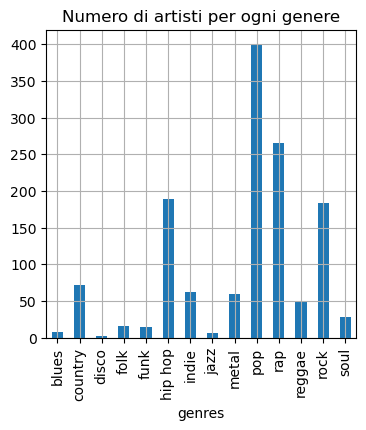

genres
pop        400
rap        266
hip hop    189
rock       183
country     72
indie       62
metal       60
reggae      48
soul        28
folk        16
funk        14
blues        8
jazz         6
disco        2
Name: genres, dtype: int64

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(4,4))
( artists.groupby(['genres'])['name'].
         count().
         plot.
         bar() )

plt.grid()
plt.title('Numero di artisti per ogni genere')
plt.show()

artists.groupby(['genres'])['genres'].count().sort_values(ascending=False)

Vi sono, dunque, **400 artisti** che producono **pop**, **266 artisti** che producono **rap** e così via.

I top tre **generi più prodotti dagli artisti** sono: **pop**, **rap** e **hip hop**.

**2.2.2 - Numero di followers per genere**

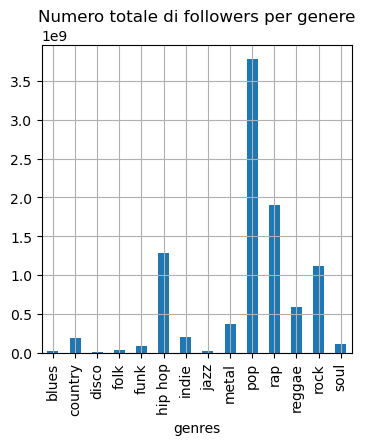

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(4,4))
( artists.groupby('genres')['followers'].
                sum().
                plot.
                bar() )
plt.grid()
plt.title(f'Numero totale di followers per genere')
plt.show()


Tra tutti i generi, il **pop** presenta il maggior numero di **followers in totale**, seguito da **rap** e **hip hop**.

In [13]:
def perc_followers(value):
    tot = artists['followers'].sum()
    return (value / tot) * 100

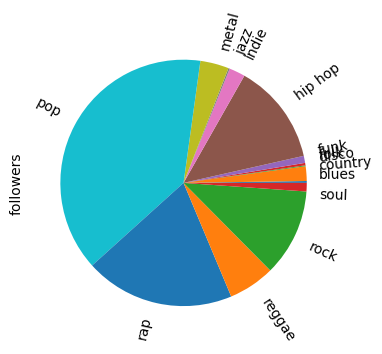

genres
pop        3778652019
rap        1907510261
hip hop    1288757746
rock       1113953258
reggae      593146805
metal       364421658
indie       204366544
country     186588627
soul        108357974
funk         89679865
folk         31233170
blues        23678542
jazz         17444353
disco        11274646
Name: followers, dtype: object

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(4,4))
( artists.groupby('genres')['followers'].
                sum().
                apply(perc_followers).
                plot.
                pie(rotatelabels=True) )
plt.grid()
plt.show()

artists.groupby('genres')['followers'].sum().sort_values(ascending=False)

È possibile notare che vi è una certa **correlazione** tra la **il numero di artisti che producono un certo genere** e il **numero totale di followers per genere**, soprattutto per quando riguarda generi maggiormente prodotti e generi con il maggior numero di followers.

**2.2.3 - Media di followers per genere**

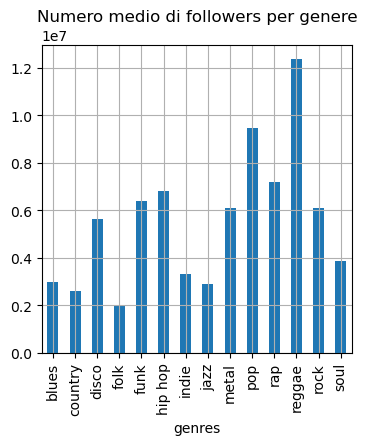

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(4,4))
( artists.groupby('genres')['followers'].
                mean().
                plot.
                bar() )

plt.title(f'Numero medio di followers per genere')
plt.grid()
plt.show()


Se si considera, invece, la quantità media di followers, ovvero il *numero di followers per genere* in *rapporto* al *numero di artisti che producono questo genere*, risulta che il genere con il **maggior numero di followers in media**, ovvero considerando anche il numero di artisti, è il **raggae**. 

**2.2.4 - Percentuale di popolarità per ogni genere**

Si sottolinea che la **popolarità** è un valore compreso tra 0 e 100, dove 100 indica la popolarità massima e 0 la popolarità minima. Viene calcolata da Spotify mediante un algoritmo che **si basa sulla popolarità di tutte le track dell'artista**. La popolarità di una track è calcolata dal **numero totale di ascolti** che ha avuto e da quanto **recenti** sono questi ascolti.

In [16]:
def perc_popularity(value):
    tot = artists['genres'].count()
    return (value / tot) * 100

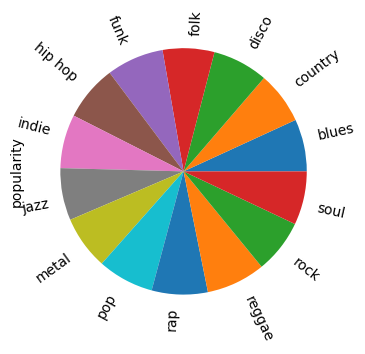

genres
reggae     5.819178
funk       5.639375
pop        5.545606
rap        5.519985
hip hop    5.474666
disco      5.465288
rock       5.302645
indie      5.300901
metal      5.281881
soul       5.280650
blues      5.151403
jazz       5.145249
country    5.133965
folk       5.096012
Name: popularity, dtype: float64

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(4,4))
( artists.groupby('genres')['popularity'].
                mean().
                apply(perc_popularity).
                plot.
                pie(rotatelabels=True) )
plt.grid()
plt.show()

artists.groupby(['genres'])['popularity'].mean().apply(perc_popularity).sort_values(ascending=False)

Ogni **genere**, dunque, è **sufficientemente ascoltato dal proprio pubblico**. Ciò vuol dire che il numero di followers e il numero di artisti per genere non influenza la popolarità dello stesso. In proporzione, non vi è un genere che viene ascoltato molto meno rispetto ad un altro. Tra tutti i generi, quello che, sempre in proporzione, è più popolare in questo momento è il **reggae**.

<a id="3"></a>
<div class="list-group" id="list-tab" role="tablist">
<h2 class="list-group-item list-group-item-action active" data-toggle="list" style='background:black; border:0; color:white' role="tab" aria-controls="home"><center>3. Conclusione</center></h2>
    


Alla luce dei risultati ottenuti, è possibile osservare una certa **correlazione** tra i **generi più prodotti** dagli artisti, i **generi con più followers** . L'ultimo risultato, ovvero quello riguardante la **popolarità**, permette di arrivare ad una considerazione: ovvero che la popolarità, intesa come numero di ascolti, è **indipendente** dal numero di followers e di artisti che producono quel determinato genere. Nell'ipotesi in cui tutti i generi avessero stesso numero di artisti e stesso numero di followers, la loro popolarità, ovvero la frequenza di ascolto delle canzoni, sarebbe simile per ogni genere.